In [1]:
import os

os.chdir('../.')

%pwd

'd:\\work\\loan-approval-prediction'

In [2]:
def understanding_data(df):
    """basic information of input data"""
    print('total rows and columns: {}'.format(df.shape))
    print('field/attribute/feature names: \n{}'.format(list(df.columns)))
    # check data types
    print('data types: \n{}'.format(df.dtypes))
    # check top5 records
    print('top 5 records: \n{}'.format(df.head()))
    # total no. of rows
    print('total records: {}'.format(df.shape[0]))
    return


In [3]:
import matplotlib.pyplot as plt
import numpy as np


def missing_inforation_status(df, display=False):
    """find missing values in input data"""
    # 1) missing Value identification
    total_records = df.shape[0]
    missing_value_fields = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            missing_value_fields.append(col)
        # print % of missing values in each columns/fields
        print(col+' missing value: ', round((df[col].isnull().sum()/total_records)*100, 2),' %')
    # 2) find relationship between missing values and target variable
    for feature in missing_value_fields:
        data = df.copy()
        # let's make a variable that indicates 1 if the observation was missing or zero otherwise
        data[feature] = np.where(data[feature].isnull(), 1, 0)
        if display == True:
            # let's calculate the mean target value where the information is missing or present
            data.groupby(feature)['Loan_Status'].count().plot.bar() # count is applied as Y is categorical ortherwise apply median/mean
            plt.title(feature)
            plt.show()
    return

In [4]:
def univariate_analysis(df, display_stats=False, display_numerical=False, display_categorical=False, display_outlier=False, is_return=False):
    """univariate analysis - individual parameter analysis"""       
    # features
    numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']  # 'O' = Object ddtype
    discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<15]
    continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
    categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
    
    if display_stats == True:
        print('Number of numerical variables: {}\n{}'.format(len(numerical_features), numerical_features))
        print("Continuous feature Count {}\n{}".format(len(continuous_feature), continuous_feature))
        print("Discrete Variables Count: {}\n{}".format(len(discrete_feature), discrete_feature))
        print("Categorical feature Count {}\n{}".format(len(categorical_features), categorical_features))
    
    if display_numerical == True:
        # Numerical variables are usually of 2 type
        # 1. Continous variable and Discrete Variables
        # visualise the numerical variables
        # df[numerical_features].head()
        ## Lets Find the realtionship between discrete_feature and target variable
        for feature in discrete_feature:
            data = df.copy()
            data.groupby(feature)['Loan_Status'].count().plot.bar()
            plt.xlabel(feature)
            plt.ylabel('Loan_Status')
            plt.title('discrete_feature - '+feature)
            plt.show()
        
        ## Lets analyse the continuous values by creating histograms to understand the distribution
        for feature in continuous_feature:
            data = df.copy()
            data[feature].hist(bins=35)
            plt.xlabel(feature)
            plt.ylabel("Count")
            plt.title('continuous_feature - '+feature)
            plt.show()
        
        # as continuous feature has some bias in the data therefore log-tranformation applied
        # We will be using logarithmic transformation        
        for feature in continuous_feature:
            data = df.copy()
            if 0 not in data[feature].unique():
                data[feature]=np.log(data[feature])
                # data['Loan_Status_num']=np.log(data['Loan_Status_num'])
                # plt.scatter(data[feature],data['Loan_Status_num'])
                data[feature].hist(bins=35)
                plt.xlabel(feature)
                plt.ylabel('Count')
                plt.title('continuous_feature log - '+feature)
                plt.show()
        
    if display_outlier == True:
        # Outlier detection
        for feature in continuous_feature:
            data = df.copy()
            if 0 not in data[feature].unique():
                data[feature]=np.log(data[feature])
                data.boxplot(column=feature)
                plt.ylabel(feature)
                plt.title(feature)
                plt.show()
    
    if display_categorical == True:
        # categorical variable analysis
        for feature in categorical_features:
            print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))
        
        ## Find out the relationship between categorical variable and target variable
        for feature in categorical_features:
            if feature != 'Loan_ID':
                data=df.copy()
                data.groupby(feature)['Loan_Status'].count().plot.bar()
                plt.xlabel(feature)
                plt.ylabel('Loan_Status')
                plt.title(feature)
                plt.show()
                
    if is_return == True:
        return numerical_features, continuous_feature, discrete_feature, categorical_features
    return

In [17]:
import pandas as pd

def bivariate_analysis(df, display_numerical=False, display_categorical=False):
    """
    Bivariate Analysis
    -------------------
    Let’s recall some of the hypotheses that we generated earlier:
    
    1) Applicants with high incomes should have more chances of loan approval.
    2) Applicants who have repaid their previous debts should have higher chances of loan approval.
    3) Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
    4) Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.
    """
    
    numerical_features, continuous_feature, discrete_feature, categorical_features = univariate_analysis(df, is_return=True)
    
    if display_numerical == True:
        # Numerical Independent Variable vs Target Variable
        # 1) discrete Independent Variable vs Target Variable
        for feature in discrete_feature:
            data = df.copy()
            feat = pd.crosstab(data[feature], data['Loan_Status'])
            feat.div(feat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
            plt.show()
        
        # 1) continuous Independent Variable vs Target Variable
        # make the continuous variable in ordinal
        for feature in continuous_feature:
            data = df.copy()
            if feature == 'ApplicantIncome':
                bins=[0,2500,4000,6000,81000]
                group=['Low','Average','High','Very high']
                data['Income_bin']=pd.cut(data['ApplicantIncome'], bins, labels=group)
                Income_bin=pd.crosstab(data['Income_bin'], data['Loan_Status'])
                Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
                plt.xlabel('ApplicantIncome')
                plt.ylabel('Percentage')
            elif feature == 'CoapplicantIncome':
                bins=[0,1000,3000,42000]
                group=['Low','Average','High']
                data['Coapplicant_Income_bin']=pd.cut(data['CoapplicantIncome'], bins, labels=group)
                Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'], data['Loan_Status'])
                Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
                plt.xlabel('CoapplicantIncome')
                plt.ylabel('Percentage')
            elif feature == 'LoanAmount':
                bins=[0,100,200,700]
                group=['Low','Average','High']
                data['LoanAmount_bin']=pd.cut(data['LoanAmount'], bins, labels=group)
                LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'], data['Loan_Status'])
                LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
                plt.xlabel('LoanAmount')
                plt.ylabel('Percentage')
                
    if display_categorical == True:
        # Categorical Independent Variable vs Target Variable
        for feature in categorical_features:
            if feature != 'Loan_ID':
                data = df.copy()
                feat = pd.crosstab(data[feature], data['Loan_Status'])
                feat.div(feat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
                plt.show()
    return

In [9]:
from src.utils import input_dataframe

# read data
in_file = "notebooks/data/input_training_data.csv"

df = input_dataframe(in_file)

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
295,LP001949,Male,Yes,4.0,Graduate,NaN,4416,1250.0,110.0,360.0,1.0,Urban,Y
171,LP001585,NaN,Yes,4.0,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
262,LP001870,Female,No,1.0,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
238,LP001790,Female,No,1.0,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,Y
159,LP001552,Male,Yes,0.0,Graduate,No,4583,5625.0,255.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,LP001213,Male,Yes,1.0,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
200,LP001674,Male,Yes,1.0,Not Graduate,No,2600,2500.0,90.0,360.0,1.0,Semiurban,Y
411,LP002319,Male,Yes,0.0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y
524,LP002697,Male,No,0.0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N


In [10]:
# UNDERSTAND DATA
#==============================

understanding_data(df)


total rows and columns: (422, 13)
field/attribute/feature names: 
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
data types: 
Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
top 5 records: 
      Loan_ID  Gender Married  Dependents Education Self_Employed  \
295  LP001949    Male     Yes         4.0  Graduate           NaN   
171  LP001585     NaN     Yes         4.0  Graduate            No   
262  LP001870  Female      No         1.0  Graduate            No   
238  LP001790  Female      No        

Loan_ID missing value:  0.0  %
Gender missing value:  2.37  %
Married missing value:  0.71  %
Dependents missing value:  2.61  %
Education missing value:  0.0  %
Self_Employed missing value:  4.98  %
ApplicantIncome missing value:  0.0  %
CoapplicantIncome missing value:  0.0  %
LoanAmount missing value:  4.98  %
Loan_Amount_Term missing value:  2.37  %
Credit_History missing value:  7.58  %
Property_Area missing value:  0.0  %
Loan_Status missing value:  0.0  %


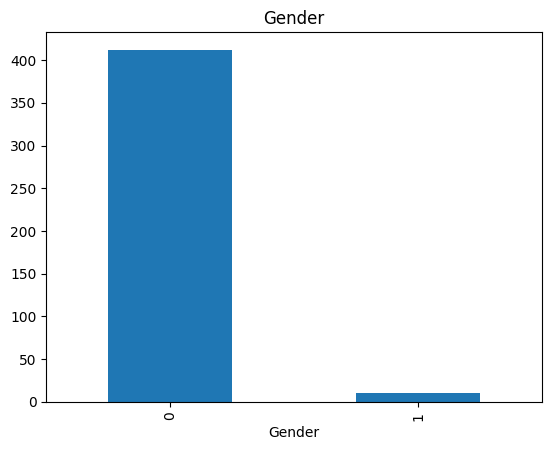

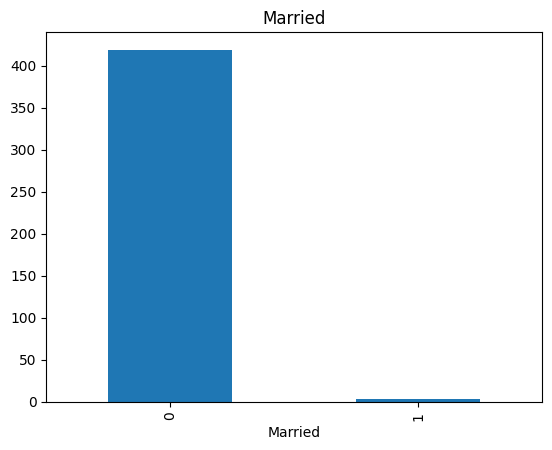

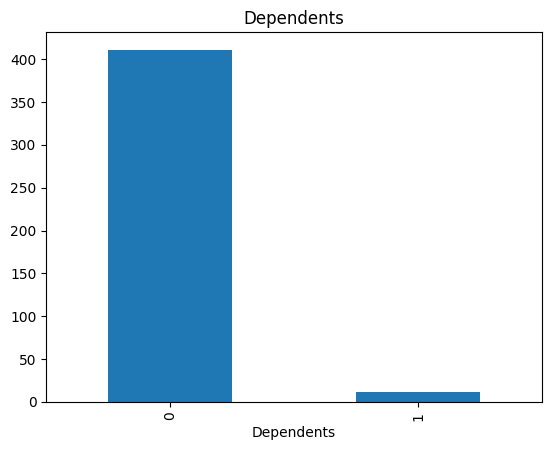

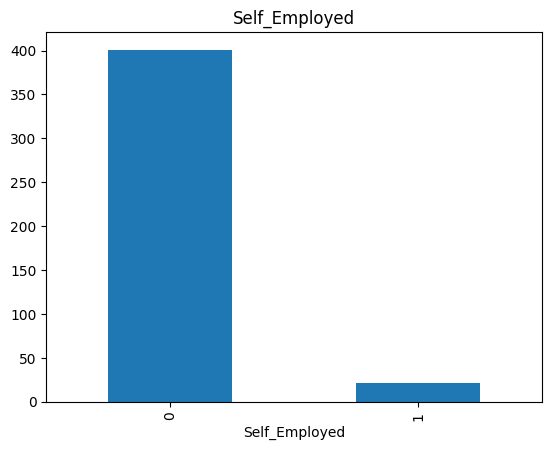

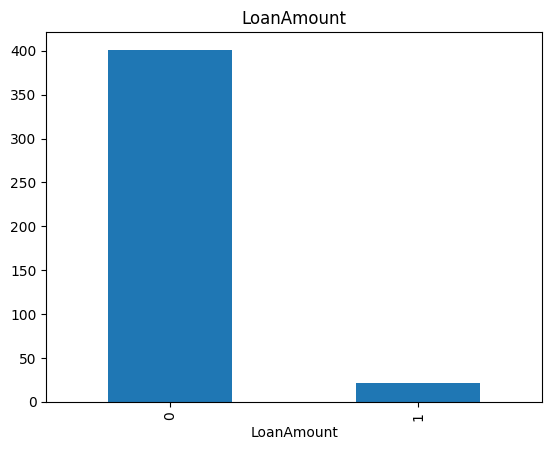

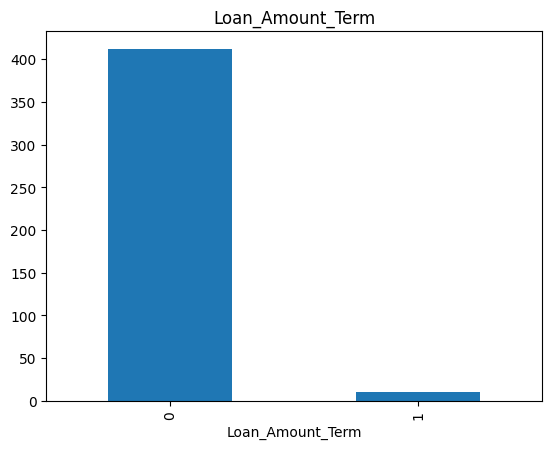

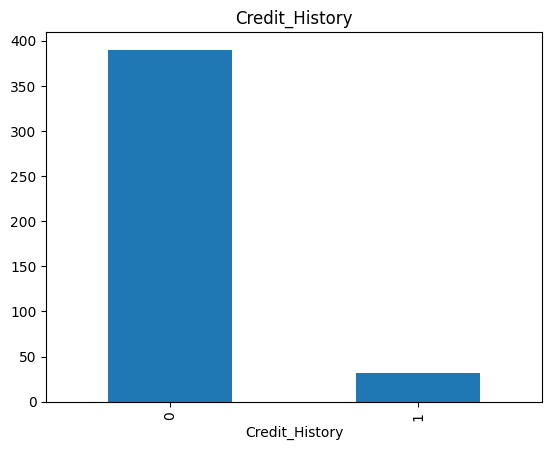

In [11]:
# EXPLORATORY DATA ANALYSIS (EDA)
#================================

missing_inforation_status(df, display=True)


In [12]:
univariate_analysis(df, display_stats=True)


Number of numerical variables: 6
['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Continuous feature Count 3
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
Discrete Variables Count: 3
['Dependents', 'Loan_Amount_Term', 'Credit_History']
Categorical feature Count 7
['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


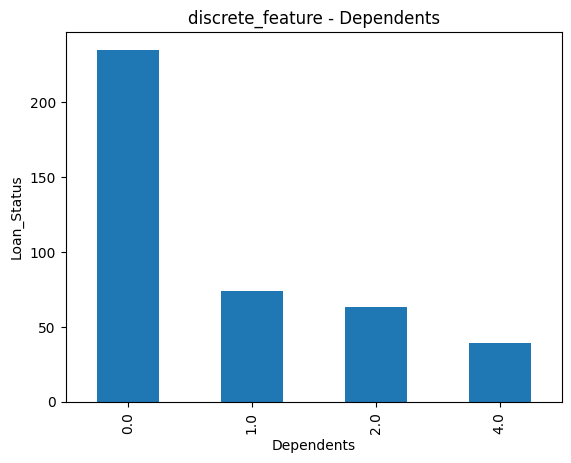

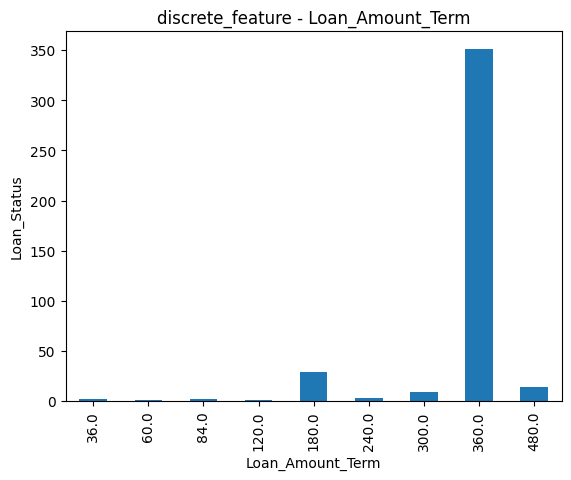

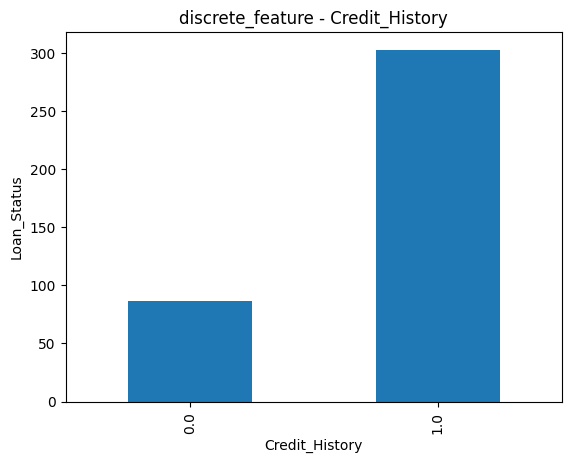

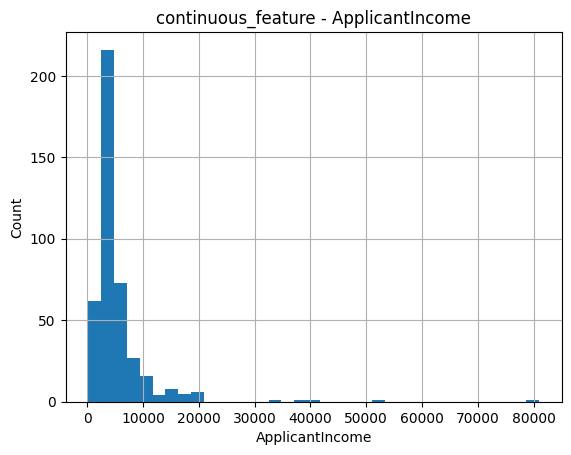

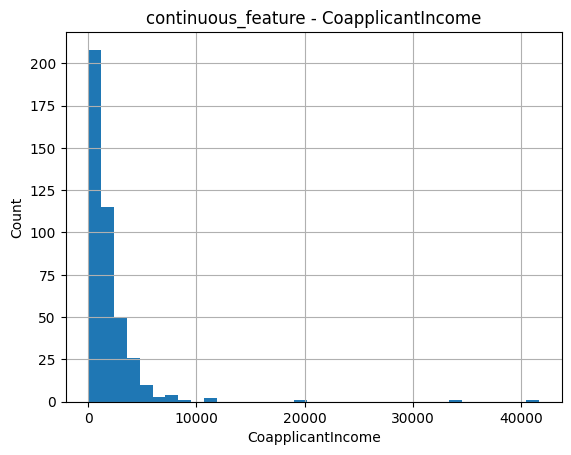

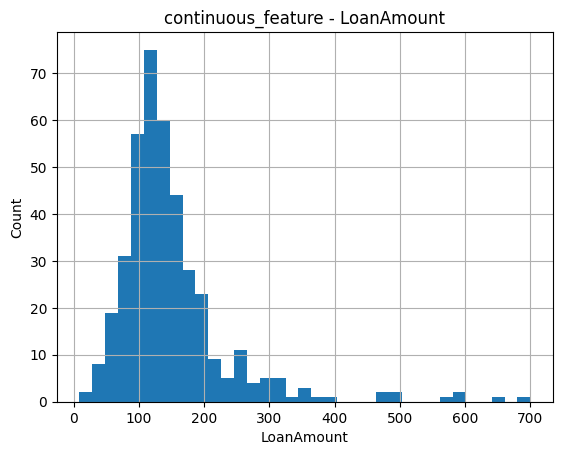

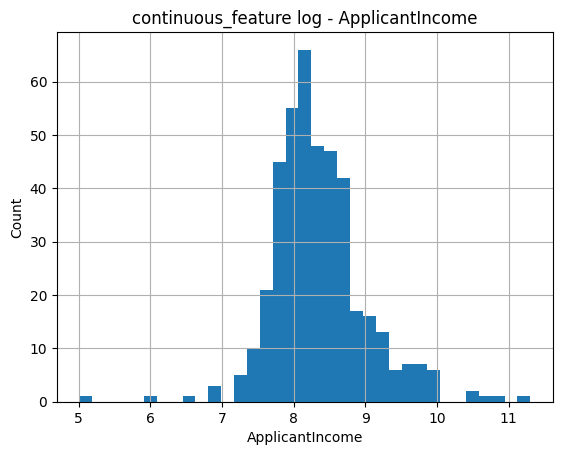

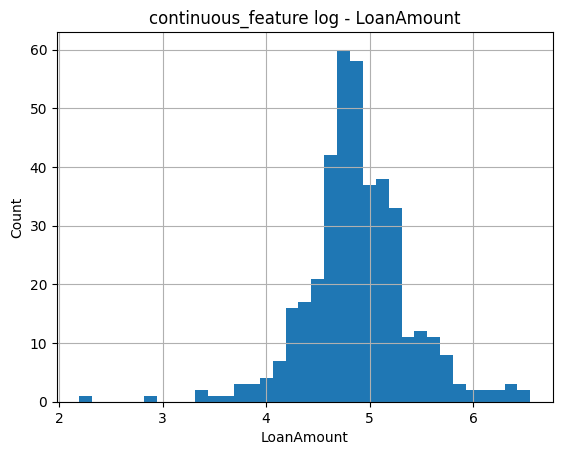

In [13]:
univariate_analysis(df, display_numerical=True)


The feature is Loan_ID and number of categories are 422
The feature is Gender and number of categories are 3
The feature is Married and number of categories are 3
The feature is Education and number of categories are 2
The feature is Self_Employed and number of categories are 3
The feature is Property_Area and number of categories are 3
The feature is Loan_Status and number of categories are 2


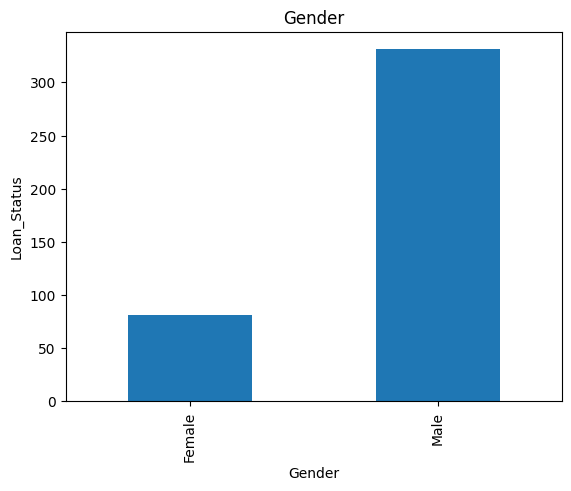

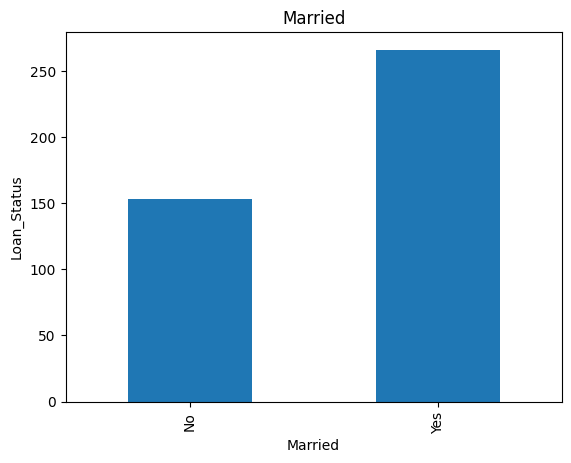

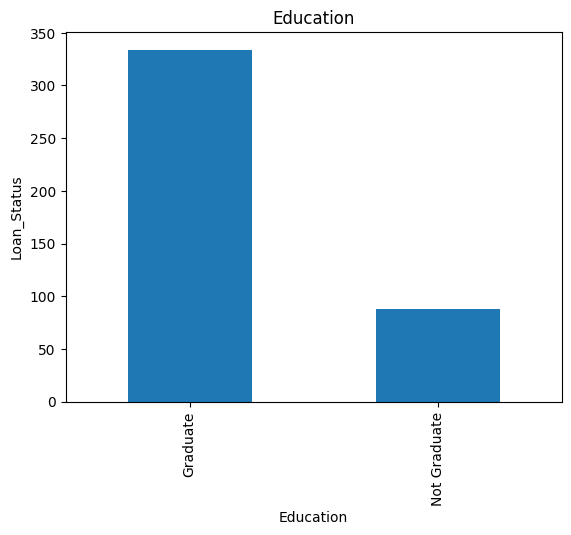

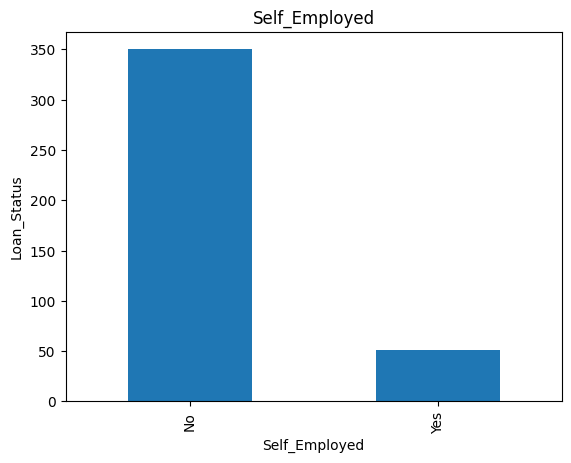

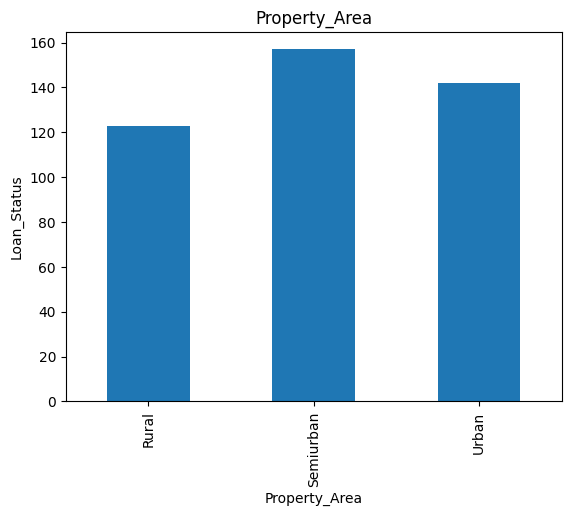

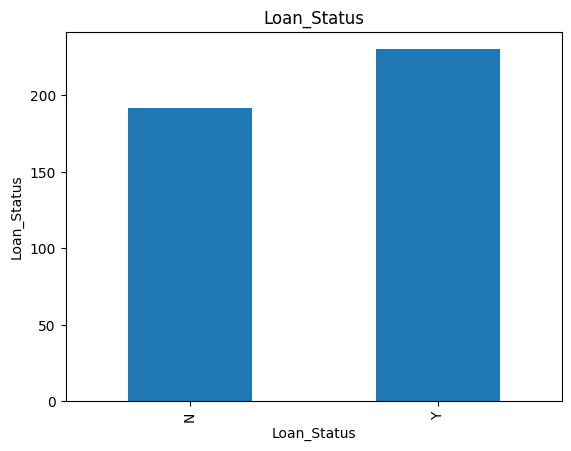

In [14]:
univariate_analysis(df, display_categorical=True)


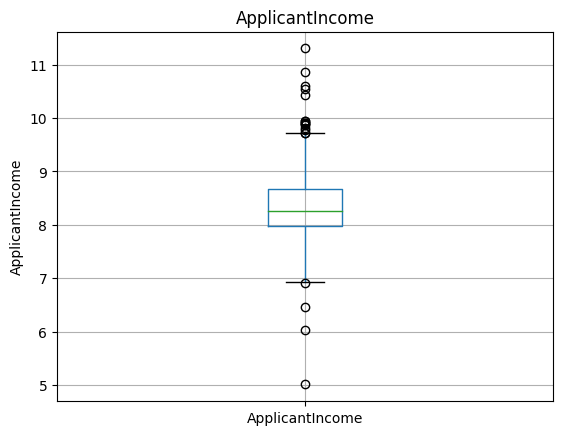

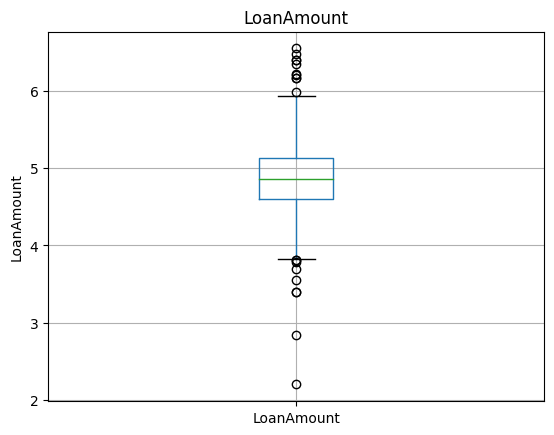

In [15]:
univariate_analysis(df, display_outlier=True)


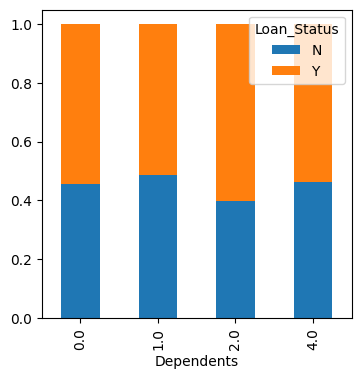

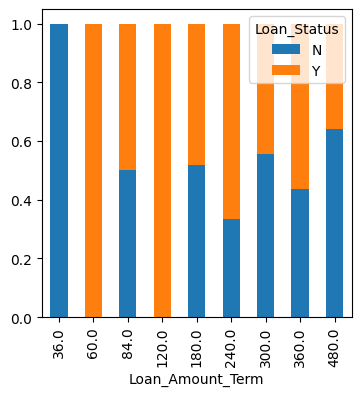

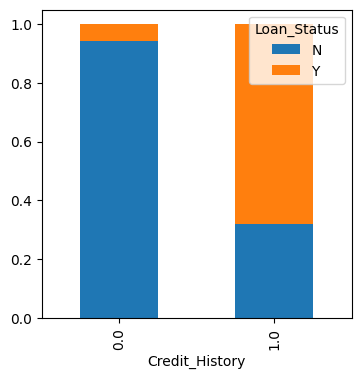

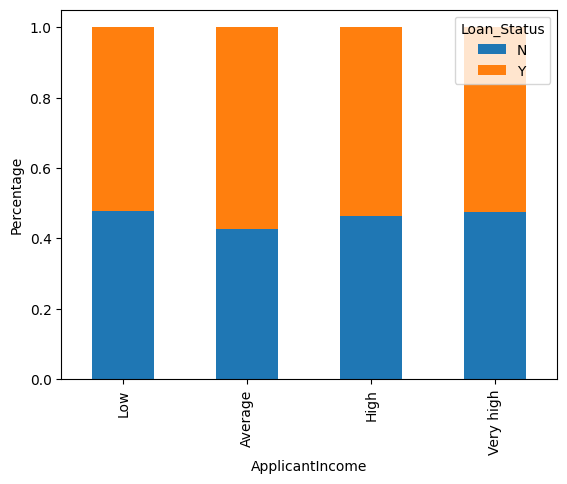

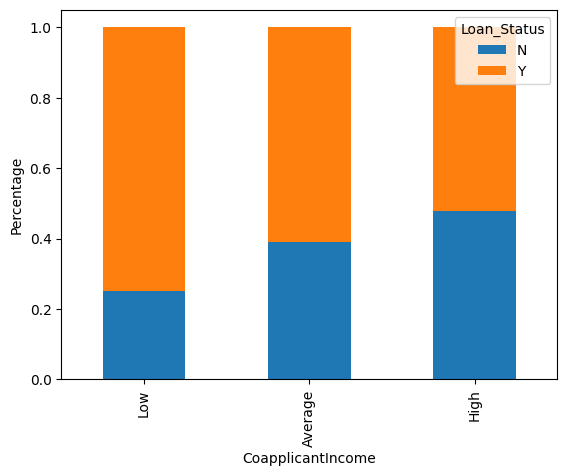

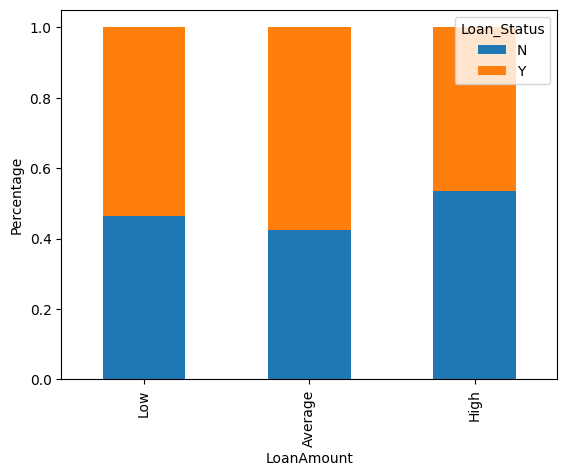

In [18]:
bivariate_analysis(df, display_numerical=True)


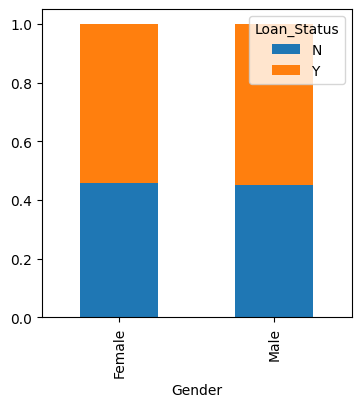

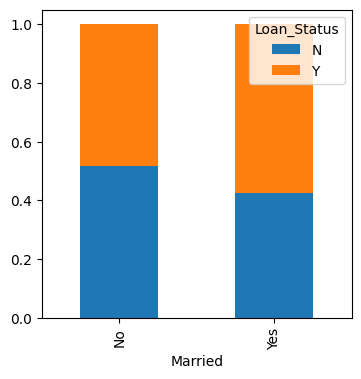

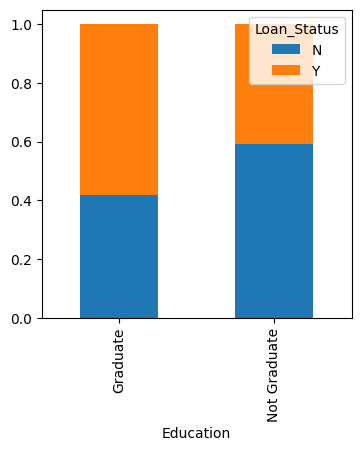

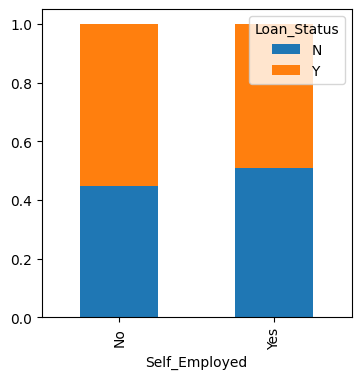

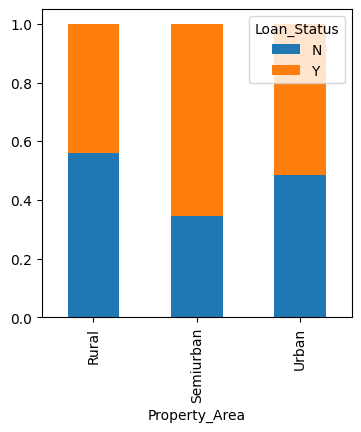

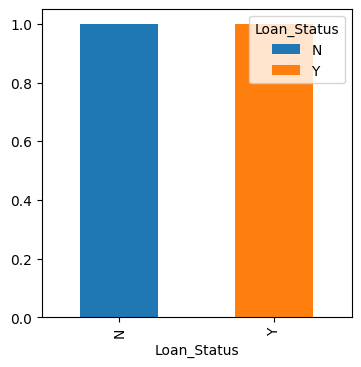

In [19]:
bivariate_analysis(df, display_categorical=True)


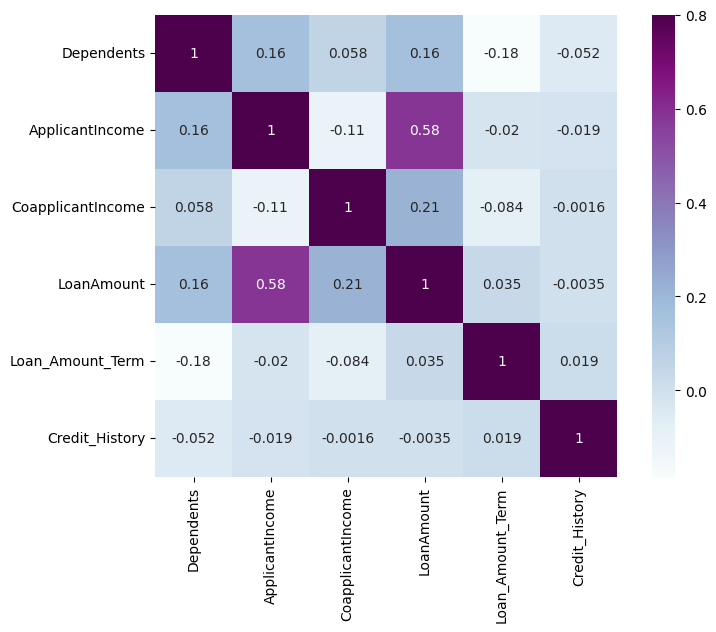

In [21]:
import seaborn as sns

def numericalvar_correlation_heatmap(df, is_heatmap=False):
    """
    Now let’s look at the correlation between all the numerical variables. 
    We will use the heat map to visualize the correlation. 
    Heatmaps visualize data through variations in coloring. 
    The variables with darker color means their correlation is more.
    """
    numerical_features, _, _, _ = univariate_analysis(df, is_return=True)
    
    # drop unnecessary columns
    data = df[numerical_features]
    matrix = data.corr()
    if is_heatmap == True:
        f, ax = plt.subplots(figsize=(9,6))
        sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)
    """
    We see that the most correlate variables are (ApplicantIncome — LoanAmount) and 
    (Credit_History — Loan_Status). 
    LoanAmount is also correlated with CoapplicantIncome.
    """
    return

numericalvar_correlation_heatmap(df, is_heatmap=True)